# mmdpotatoes
Grade potato quality by shape and skin spots.


# Description

The input image is a gray-scale image of several washed potatoes. The shape of the potatoes is analysed using skeleton feature and the skin spots are detected. These two features can be used to evaluate their visual quality.


In [1]:
import numpy as np
from PIL import Image
import ia870 as ia
import matplotlib.pyplot as plt
print(ia.__version__)

ia870 Python Morphology Toolbox version 0.8 25th Aug 2014 - in progress - migrating to Python 3


# Reading

The input image is read. 

(-0.5, 380.5, 335.5, -0.5)

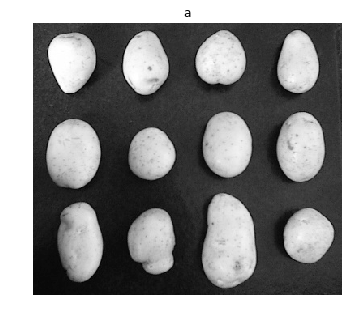

In [2]:
a_pil = Image.open('../data/potatoes.tif').convert('L')
a = np.array (a_pil)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('a')
axes.imshow(a, cmap='gray')
axes.axis('off')

# Thresholding

Convert to binary objects by thresholding 

(-0.5, 380.5, 335.5, -0.5)

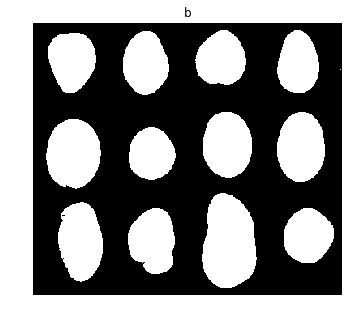

In [3]:
b = ia.iathreshad(a,90)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('b')
axes.imshow(b, cmap='gray')
axes.axis('off')

# Skeleton of the potato shapes

The binary image is thinned and the result overlayed on the original image 

(-0.5, 380.5, 335.5, -0.5)

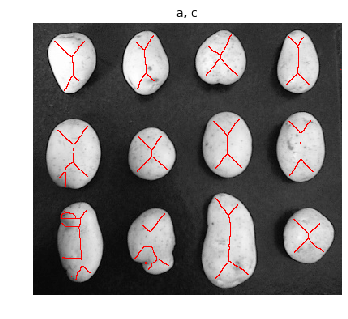

In [4]:
c = ia.iathin(b)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('a, c')
axes.imshow(ia.iagshow(a, c).transpose(1, 2, 0))
axes.axis('off')

# Closing tophat

To detect the skin spots, a closing tophat can enhance the dark areas of the image 

(-0.5, 380.5, 335.5, -0.5)

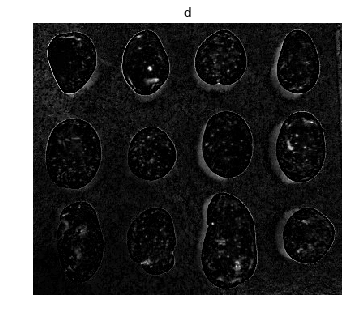

In [5]:
d = ia.iacloseth(a,ia.iasedisk(5))

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('d')
axes.imshow(d, cmap='gray')
axes.axis('off')

# Thresholding and masking

The tophat is thresholded and the result is masked with the binary image of the potatoes as we are interested only on the spots inside them 

(-0.5, 380.5, 335.5, -0.5)

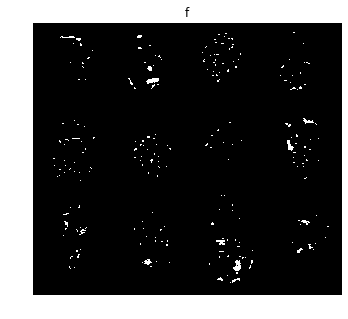

In [6]:
e = ia.iathreshad(d,20)
f = ia.iaintersec(e,b)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('f')
axes.imshow(f, cmap = 'gray')
axes.axis('off')

# Final display

Show both results: skeleton and skin spots overlayed on the original image 

(-0.5, 380.5, 335.5, -0.5)

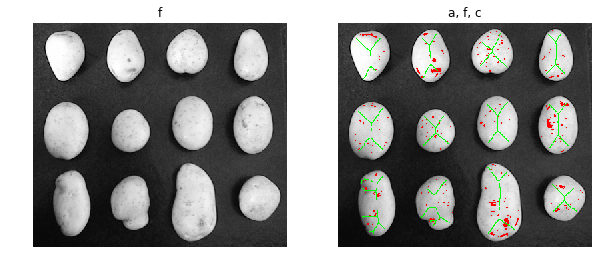

In [7]:
f = ia.iaintersec(e, b)
(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('f')
axes[0].imshow(a, cmap = 'gray')
axes[0].axis('off')
axes[1].set_title('a, f, c')
axes[1].imshow(ia.iagshow(a, f, c).transpose(1, 2, 0))
axes[1].axis('off')